<a href="https://colab.research.google.com/github/jesse-venson/Cognitive/blob/main/cognitive_assign_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(102317013)

sales_data = np.random.randint(1000, 5001, size=(12, 4))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
categories = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']

df_sales = pd.DataFrame(sales_data, index=months, columns=categories)

In [2]:
# 1. Display first 5 rows and summary statistics
print("First 5 rows:\n", df_sales.head())
print("\nSummary statistics:\n", df_sales.describe())

# 2. Total sales per category and per month
total_sales_per_category = df_sales.sum()
total_sales_per_month = df_sales.sum(axis=1)
print("\nTotal sales per category:\n", total_sales_per_category)
print("\nTotal sales per month:\n", total_sales_per_month)

# 3. Average sales growth between consecutive months per category
avg_growth_per_category = df_sales.pct_change().mean() * 100
print("\nAverage sales growth per category (%):\n", avg_growth_per_category)

# 4. Add Total Sales and Growth Rate columns
df_sales['Total Sales'] = df_sales.sum(axis=1)
df_sales['Growth Rate'] = df_sales['Total Sales'].pct_change() * 100

# 5. Apply discount based on roll number (odd -> Clothing 15%)
df_sales['Clothing (Discounted)'] = df_sales['Clothing'] * 0.85

First 5 rows:
      Electronics  Clothing  Home & Kitchen  Sports
Jan         3069      1392            1206    3250
Feb         2166      1028            3865    1363
Mar         2404      1883            4130    2255
Apr         2522      3610            3904    2060
May         2255      1202            2000    3702

Summary statistics:
        Electronics     Clothing  Home & Kitchen       Sports
count     12.00000    12.000000       12.000000    12.000000
mean    3009.25000  2232.500000     3425.416667  3061.416667
std     1030.91796  1343.546088     1075.920533  1050.055103
min     1918.00000  1028.000000     1206.000000  1363.000000
25%     2249.75000  1178.250000     2824.750000  2206.250000
50%     2671.50000  1652.000000     3738.500000  2967.000000
75%     3358.75000  3140.500000     4168.500000  3824.750000
max     4926.00000  4625.000000     4766.000000  4591.000000

Total sales per category:
 Electronics       36111
Clothing          26790
Home & Kitchen    41105
Sports  

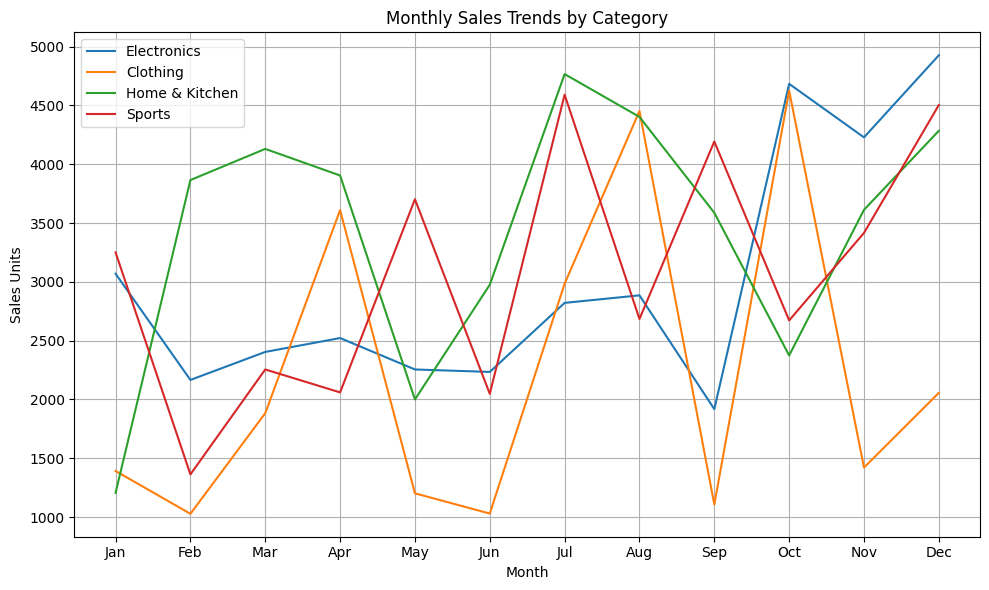

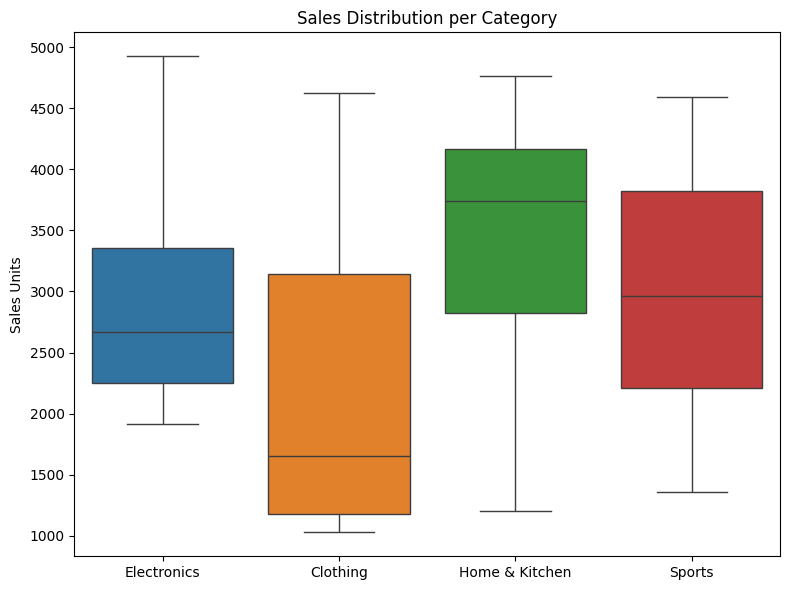

In [3]:
# Line plot: Monthly sales trends
plt.figure(figsize=(10, 6))
for col in categories:
    plt.plot(df_sales.index, df_sales[col], label=col)
plt.title('Monthly Sales Trends by Category')
plt.xlabel('Month')
plt.ylabel('Sales Units')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_sales_trend.png")
plt.show()

# Box plot: Sales distribution per category
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_sales[categories])
plt.title('Sales Distribution per Category')
plt.ylabel('Sales Units')
plt.tight_layout()
plt.savefig("sales_distribution_boxplot.png")
plt.show()

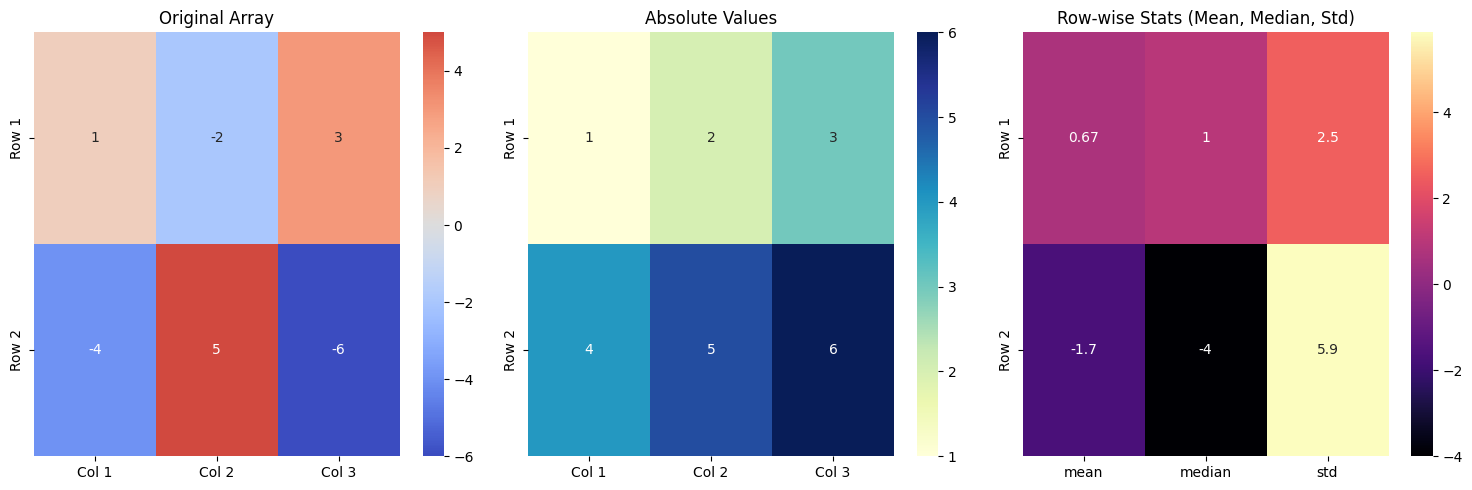


Flattened Array Percentiles (25%, 50%, 75%): [-3.5 -0.5  2.5]

Column-wise Percentiles:
      Col 1  Col 2  Col 3
25%  -2.75  -0.25  -3.75
50%  -1.50   1.50  -1.50
75%  -0.25   3.25   0.75

Row-wise Percentiles:
        25%  50%  75%
Row 1 -0.5  1.0  2.0
Row 2 -5.0 -4.0  0.5

Flattened Array Stats:
 {'Mean': np.float64(-0.5), 'Median': np.float64(-0.5), 'Std Dev': np.float64(3.8622100754188224)}

Column-wise Stats:
            Col 1     Col 2     Col 3
mean   -1.500000  1.500000 -1.500000
median -1.500000  1.500000 -1.500000
std     3.535534  4.949747  6.363961

Row-wise Stats:
            mean  median       std
Row 1  0.666667     1.0  2.516611
Row 2 -1.666667    -4.0  5.859465


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Step 1: Define the Array
# ---------------------------
array = np.array([[1, -2, 3], [-4, 5, -6]])
df_array = pd.DataFrame(array, index=['Row 1', 'Row 2'], columns=['Col 1', 'Col 2', 'Col 3'])

# ---------------------------
# Step 2: Element-wise Absolute Value
# ---------------------------
abs_df = df_array.abs()

# ---------------------------
# Step 3: Percentiles
# ---------------------------
flat = df_array.values.flatten()
flat_percentiles = np.percentile(flat, [25, 50, 75])
col_percentiles = pd.DataFrame(np.percentile(df_array, [25, 50, 75], axis=0),
                               index=['25%', '50%', '75%'],
                               columns=df_array.columns)
row_percentiles = pd.DataFrame(np.percentile(df_array, [25, 50, 75], axis=1),
                               index=['25%', '50%', '75%'],
                               columns=df_array.index).T
# Step 4: Mean, Median, Std Dev
# ---------------------------
flattened_stats = {
    'Mean': np.mean(flat),
    'Median': np.median(flat),
    'Std Dev': np.std(flat)
}

col_stats = df_array.agg(['mean', 'median', 'std'])
row_stats = df_array.T.agg(['mean', 'median', 'std']).T

# ---------------------------
# Step 5: Visualizations
# ---------------------------
plt.figure(figsize=(15, 5))

# Original Array Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(df_array, annot=True, cmap="coolwarm", center=0)
plt.title("Original Array")

# Absolute Value Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(abs_df, annot=True, cmap="YlGnBu")
plt.title("Absolute Values")

# Row-wise Stats Heatmap
plt.subplot(1, 3, 3)
sns.heatmap(row_stats, annot=True, cmap="magma")
plt.title("Row-wise Stats (Mean, Median, Std)")

plt.tight_layout()
plt.savefig("array_analysis_heatmaps.png")
plt.show()
# Step 6: Display Results
# ---------------------------
print("\nFlattened Array Percentiles (25%, 50%, 75%):", flat_percentiles)
print("\nColumn-wise Percentiles:\n", col_percentiles)
print("\nRow-wise Percentiles:\n", row_percentiles)
print("\nFlattened Array Stats:\n", flattened_stats)
print("\nColumn-wise Stats:\n", col_stats)
print("\nRow-wise Stats:\n", row_stats)


In [5]:
import numpy as np
import pandas as pd

# Define the array
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

# i. Floor, Ceiling, Truncated, and Rounded Values
floor_vals = np.floor(a)
ceil_vals = np.ceil(a)
trunc_vals = np.trunc(a)
round_vals = np.round(a)

# Create a DataFrame to show results
df_rounding = pd.DataFrame({
    "Original": a,
    "Floor": floor_vals,
    "Ceiling": ceil_vals,
    "Truncated": trunc_vals,
    "Rounded": round_vals
})

print(df_rounding)


   Original  Floor  Ceiling  Truncated  Rounded
0      -1.8   -2.0     -1.0       -1.0     -2.0
1      -1.6   -2.0     -1.0       -1.0     -2.0
2      -0.5   -1.0     -0.0       -0.0     -0.0
3       0.5    0.0      1.0        0.0      0.0
4       1.6    1.0      2.0        1.0      2.0
5       1.8    1.0      2.0        1.0      2.0
6       3.0    3.0      3.0        3.0      3.0


In [6]:
# Define a list
my_list = [10, 20, 30, 40, 50]

# Indices of the elements to swap
i = 1  # 20
j = 3  # 40

# Print original list
print("Original list:", my_list)

# Swap using a temporary variable
temp = my_list[i]
my_list[i] = my_list[j]
my_list[j] = temp

# Print modified list
print("List after swapping elements at index", i, "and", j, ":", my_list)


Original list: [10, 20, 30, 40, 50]
List after swapping elements at index 1 and 3 : [10, 40, 30, 20, 50]


In [7]:
# Define a set
my_set = {10, 20, 30, 40, 50}

# Convert set to list
my_list = list(my_set)

# Indices to swap
i = 1
j = 3

print("Original set:", my_set)
print("Converted to list:", my_list)

# Swap elements using a temporary variable
temp = my_list[i]
my_list[i] = my_list[j]
my_list[j] = temp

# Convert back to set
swapped_set = set(my_list)

print("Set after swapping elements at index", i, "and", j, ":", swapped_set)

Original set: {50, 20, 40, 10, 30}
Converted to list: [50, 20, 40, 10, 30]
Set after swapping elements at index 1 and 3 : {40, 10, 50, 20, 30}
